<a href="https://colab.research.google.com/github/redom13/ML/blob/main/CNN_img_classification_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Loading the CIFAR10 Dataset

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

# Data Exploration

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
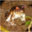

In [6]:
X_train[0]

- `32X32` images with RGB values.

In [7]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
def flatten_label(y):
  return np.array(y).reshape(-1,)

In [9]:
y_train = flatten_label(y_train)
y_test = flatten_label(y_test)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
def plot_image(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

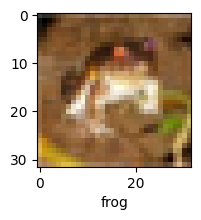

In [11]:
plot_image(X_train,y_train,0)

# Normalize Input

In [12]:
X_train = X_train / 255
X_test = X_test / 255

- When we use sparse & when we don't

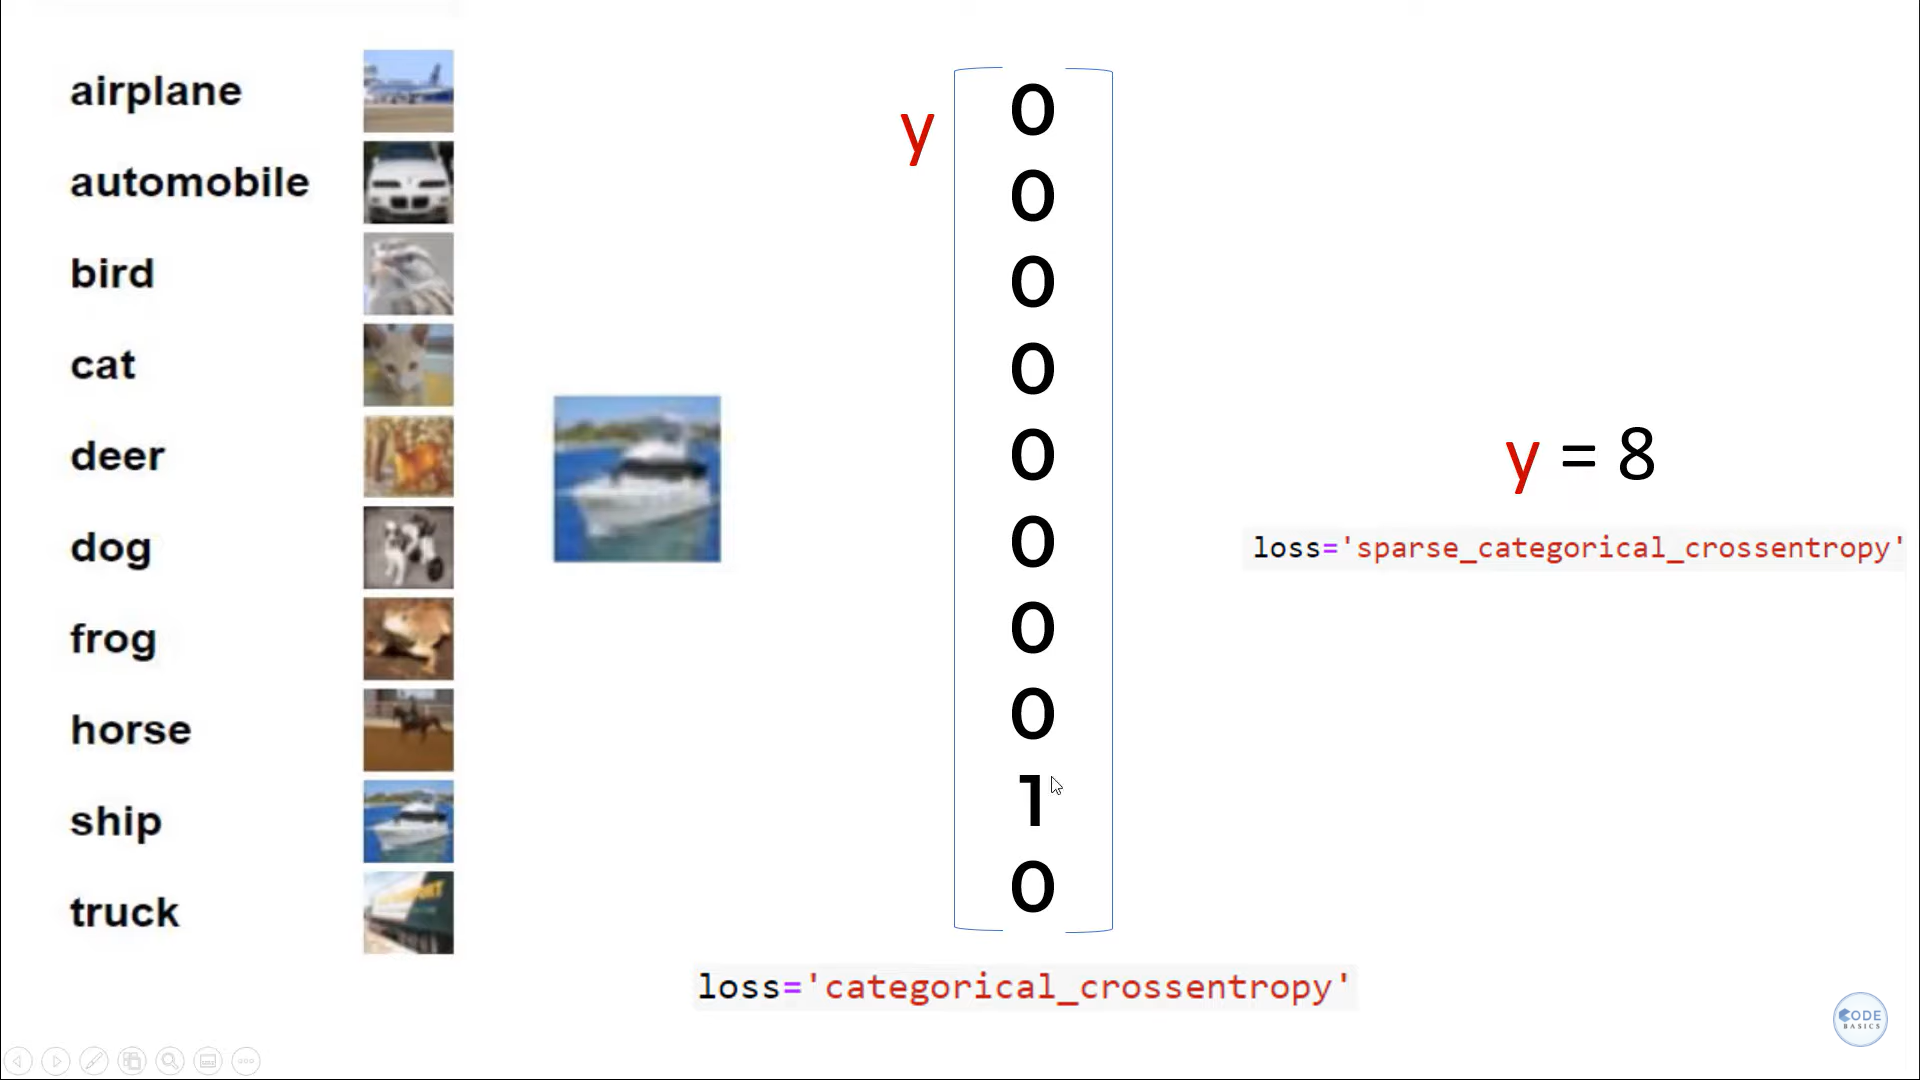

- Here as we directly have the class (i.e the index of class) We will use `sparse_categorical_crossentropy`

# CNN

## Config

In [16]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- `filters` tells us how many different `features` the model can capture
- `kernel_size` is the shape of the filters/detectors
- Using `MaxPooling` of `2X2` filter here

## Compile

In [18]:
cnn.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
             )

## Train

In [19]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3568 - loss: 1.7583
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.5892 - loss: 1.1720
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.6432 - loss: 1.0274
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6698 - loss: 0.9439
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6916 - loss: 0.8807
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7201 - loss: 0.8119
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7349 - loss: 0.7723
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.7423 - loss: 0.7458
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7592 - loss: 0.6954
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7670 - loss: 0.6708


## Evaluate on Test Data

In [20]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7040 - loss: 0.9088


[0.921524703502655, 0.6969000101089478]

## Prediction

In [21]:
y_preds = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [23]:
sum = np.sum(y_preds[0],axis=0)
sum

1.0000001

Output is 1 cz `softmax` was used

In [24]:
y_classes = [np.argmax(element) for element in y_preds]
y_classes[:5]

[3, 1, 1, 0, 6]

In [25]:
y_test[:5] == y_classes[:5]

array([ True, False, False,  True,  True])

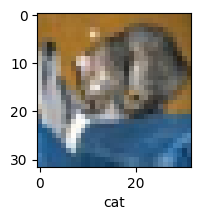

In [27]:
plot_image(X_test,y_test,0)

In [28]:
classes[y_classes[0]]

'cat'

Predicted this one correctly

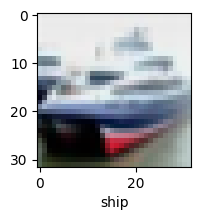

In [29]:
plot_image(X_test,y_test,1)

In [30]:
classes[y_classes[1]]

'automobile'

Wrong on this one